In [ ]:
# %pip install pillow
# %pip install matplotlib
# %pip install imageio

In [2]:
from PIL import Image, ImageDraw, ImageEnhance
from numpy import arange
import matplotlib.pyplot as plt
from imageio import imsave
import json
import stl10
import os

sys.version_info(major=3, minor=11, micro=6, releaselevel='final', serial=0)


In [126]:

def draw_transparent_squares(
        img_bin_loc,
        segment_marks_json_loc,
        img_index,  
        squarenum_x=16,  
        outline_color="#ffffff", 
        transparency=0.4
        ):

    layerColors = {
    "0": "#ffff00",
    "1": "#ff0000",
    "2": "#00ff00",
    "3": "#4169e1",
    "4": "#ff00ff",
    "5": "#ffa500",
    "6": "#00ffff",
    "7": "#00bfff",
    "8": "#cd5c5c",
    }

    with open(segment_marks_json_loc, 'r') as f:
        segment_marks = json.load(f)

    marked_squares = segment_marks[str(img_index)]

    all_images = stl10.read_all_images(img_bin_loc)
    img = Image.fromarray(all_images[int(img_index)]).convert("RGBA")
    imgWidth, imgHeight = img.size

    overlay = Image.new("RGBA", img.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(overlay)
    
    squareSize = min(imgWidth, imgHeight)/squarenum_x

    for label in marked_squares:
        # overlay = Image.new("RGBA", img.size, (255, 255, 255, 0))
        # draw = ImageDraw.Draw(overlay)
        for y in arange(0, imgHeight, squareSize):
            for x in arange(0, imgWidth, squareSize):
                top_left = (x, y)
                bottom_right = (x + squareSize, y + squareSize)

            # for label in marked_squares:
                if [int(x / squareSize), int(y / squareSize)] in marked_squares[label]:
                    draw.rectangle([top_left, bottom_right], 
                                    fill=layerColors[label[-1]]+ format(int(transparency * 255), '02X'),
                                    outline=layerColors[label[-1]] + format(int(transparency * 255), '02X'),
                                    width=1)
                else:
                    draw.rectangle([top_left, bottom_right], outline=outline_color + format(int(transparency * 255), '02X'), width=1)
    
        combined = Image.alpha_composite(img, overlay)
        combined.save(f"./1_airplane/new_{img_index}.png")
        # fig, ax = plt.subplots()
        # ax.imshow(combined)

with open('./stl10_test_airplane.json', 'r') as s: 
    saved = json.load(s)

for key in saved.keys():
    if os.path.exists(f"./1_airplane/{key}.png"):
        continue
    else:
        draw_transparent_squares("./stl10_binary/test_X.bin", './stl10_test_airplane.json', key)

In [11]:
with open('./stl10_test_bird_dup.json', 'r') as s: 
    saved = json.load(s)

toBeBlocked = [k for k in saved if len(saved[k])> 1]

In [111]:

def draw_transparent_squares_v2(
        img_bin_loc,
        segment_marks_json_loc,
        img_index,  
        squarenum_x=16,  
        outline_color="#ffffff", 
        transparency=0.4
        ):

    layerColors = {
    "0": "#ffff00",
    "1": "#ff0000",
    "2": "#00ff00",
    "3": "#4169e1",
    "4": "#ff00ff",
    "5": "#ffa500",
    "6": "#00ffff",
    "7": "#00bfff",
    "8": "#cd5c5c",
    }

    with open(segment_marks_json_loc, 'r') as f:
        segment_marks = json.load(f)

    marked_squares = segment_marks[str(img_index)]

    all_images = stl10.read_all_images(img_bin_loc)
    img = Image.fromarray(all_images[int(img_index)]).convert("RGBA")
    imgWidth, imgHeight = img.size

    overlay = Image.new("RGBA", img.size, (255, 255, 255, 0))
    draw = ImageDraw.Draw(overlay)
    
    squareSize = min(imgWidth, imgHeight)/squarenum_x

    for label in marked_squares:
        overlay = Image.new("RGBA", img.size, (255, 255, 255, 0))
        draw = ImageDraw.Draw(overlay)
        for y in arange(0, imgHeight, squareSize):
            for x in arange(0, imgWidth, squareSize):
                top_left = (x, y)
                bottom_right = (x + squareSize, y + squareSize)

            # for label in marked_squares:
                if [int(x / squareSize), int(y / squareSize)] in marked_squares[label]:
                    draw.rectangle([top_left, bottom_right], 
                                    fill=layerColors[label[-1]]+ format(int(transparency * 255), '02X'),
                                    outline=layerColors[label[-1]] + format(int(transparency * 255), '02X'),
                                    width=1)
                else:
                    draw.rectangle([top_left, bottom_right], outline=outline_color + format(int(transparency * 255), '02X'), width=1)
    
        combined = Image.alpha_composite(img, overlay)
        # combined.save(f"./1_airplane/new_{img_index}_{label}.png")
        fig, ax = plt.subplots()
        ax.imshow(combined)

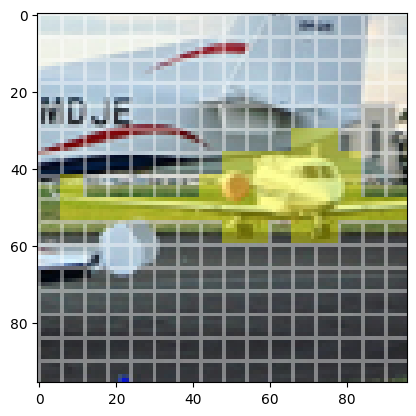

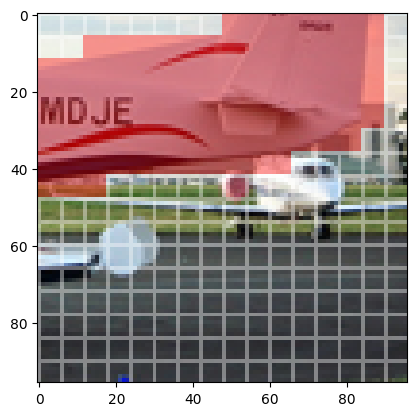

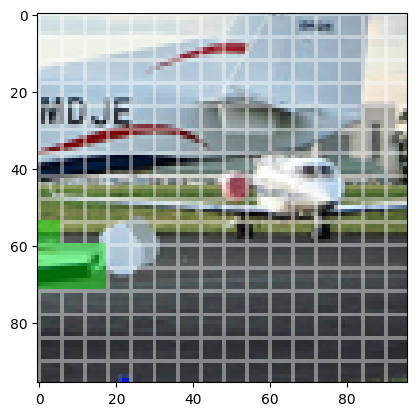

In [130]:
draw_transparent_squares_v2("./stl10_binary/test_X.bin", './stl10_test_airplane.json', "7782")


437